In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

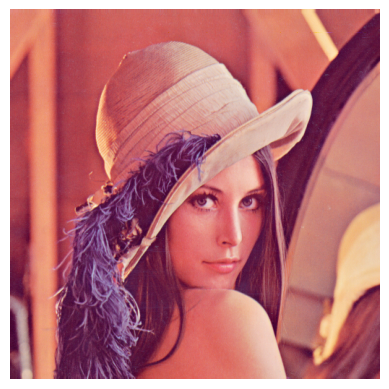

In [6]:
img = plt.imread(r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\ImageProcessingL#2\pics\lena_color_512.tif")
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
height = img.shape[0] #y-axis
width = img.shape[1] #x-axis
print(height)
print(width)

512
512


In [8]:
numHeight = int(height/16)
numWidth = int(width/16)
print(numHeight)
print(numWidth)

32
32


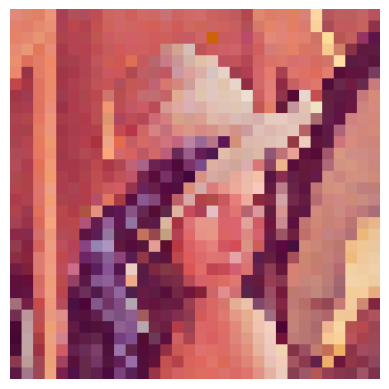

In [9]:
height, width = img.shape[:2]
block = 16

newImg = np.zeros((height, width, 3), np.uint8)

for i in range(0, height, block):
    for j in range(0, width, block):
        # pick top-left pixel of each block
        b, g, r = img[i, j]

        # fill the entire block in the new image
        newImg[i:i+block, j:j+block] = [b, g, r]

plt.imshow(newImg)
plt.axis('off')
plt.show()

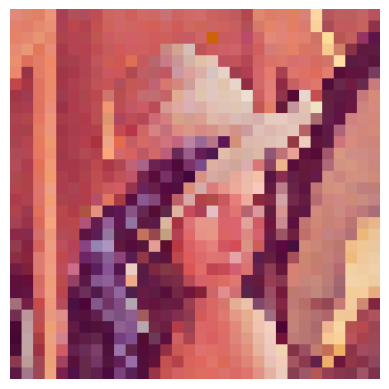

In [10]:
scale = 16
newImg2 = np.zeros((height, width, 3), np.uint8)

for i in range(height):
    for j in range(width):
        # nearest-neighbor source coordinate
        src_i = (i // scale) * scale
        src_j = (j // scale) * scale

        newImg2[i, j] = img[src_i, src_j]

plt.imshow(newImg2)
plt.axis('off')
plt.show()

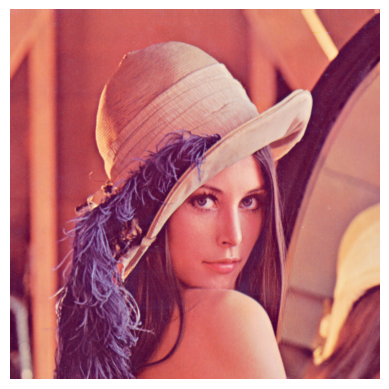

1024
1024


In [11]:
# upsample ×2

scale = 2   # upsample factor

upsampled = img.repeat(scale, axis=0).repeat(scale, axis=1)

plt.imshow(upsampled.astype(np.uint8))
plt.axis('off')
plt.show()

newHeight, newWidth = upsampled.shape[:2]
print(newHeight)
print(newWidth)

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [30]:
# -------------------------------
# Load images
# -------------------------------
img1_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_color_512.tif"
xray_path = r"C:\Users\AsiaLapTop.Com\OneDrive\Documents\Python_Image_Processing_Tasks#2\pics\lena_color_512.tif"

img1 = plt.imread(img1_path)
xray = Image.open(xray_path).convert('L')
xray = np.array(xray)

height, width = img1.shape[:2]

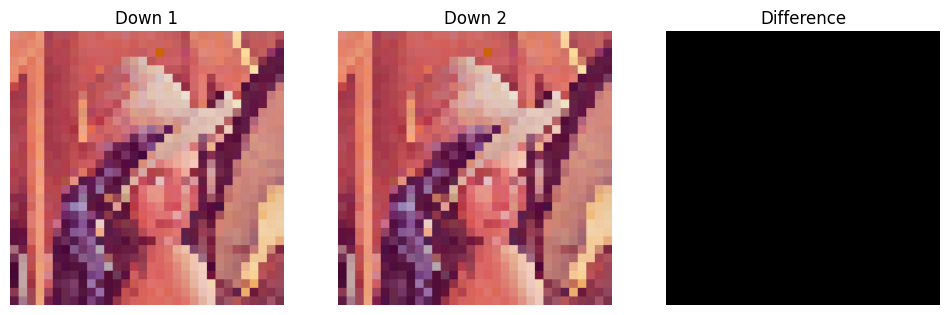

In [32]:

# -------------------------------
# 1️⃣ Down Sampling - Two methods & their difference
# -------------------------------
block = 16

# Method 1: block sampling (top-left pixel)
down1 = np.zeros((height, width, 3), np.uint8)
for i in range(0, height, block):
    for j in range(0, width, block):
        down1[i:i+block, j:j+block] = img1[i,j]

# Method 2: nearest neighbor
scale = 16
down2 = np.zeros((height, width, 3), np.uint8)
for i in range(height):
    for j in range(width):
        src_i = (i // scale) * scale
        src_j = (j // scale) * scale
        down2[i,j] = img1[src_i, src_j]

# Difference between two methods
diff = np.abs(down1.astype(int) - down2.astype(int))

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(down1); plt.axis('off'); plt.title("Down 1")
plt.subplot(1,3,2); plt.imshow(down2); plt.axis('off'); plt.title("Down 2")
plt.subplot(1,3,3); plt.imshow(diff); plt.axis('off'); plt.title("Difference")
plt.show()


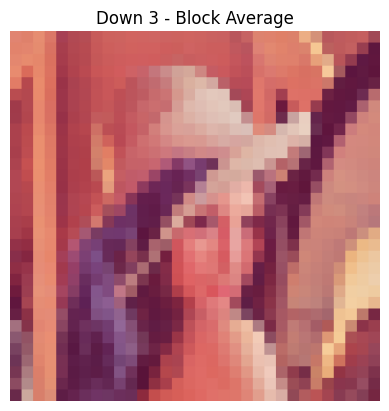

In [33]:
# -------------------------------
# 2️⃣ Third Down Sampling method: block average
# -------------------------------
down3 = np.zeros((height, width, 3), np.uint8)
for i in range(0, height, block):
    for j in range(0, width, block):
        block_region = img1[i:i+block, j:j+block]
        avg_color = block_region.mean(axis=(0,1))
        down3[i:i+block, j:j+block] = avg_color

plt.imshow(down3)
plt.axis('off')
plt.title("Down 3 - Block Average")
plt.show()

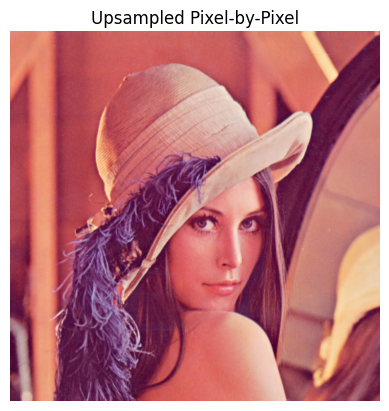

In [35]:
# -------------------------------
# 4️⃣ Pixel-by-pixel Up Sampling
# -------------------------------
height_up, width_up = height*2, width*2
upsampled_pixel = np.zeros((height_up, width_up, 3), np.uint8)
for i in range(height_up):
    for j in range(width_up):
        src_i = i // 2
        src_j = j // 2
        upsampled_pixel[i,j] = img1[src_i, src_j]

plt.imshow(upsampled_pixel)
plt.axis('off')
plt.title("Upsampled Pixel-by-Pixel")
plt.show()


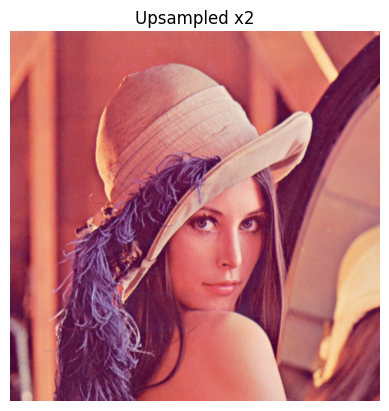

In [36]:
# -------------------------------
# 3️⃣ Effect of Scale in Up Sampling
# -------------------------------
scale_up = 2
upsampled = img1.repeat(scale_up, axis=0).repeat(scale_up, axis=1)

plt.imshow(upsampled.astype(np.uint8))
plt.axis('off')
plt.title(f"Upsampled x{scale_up}")
plt.show()

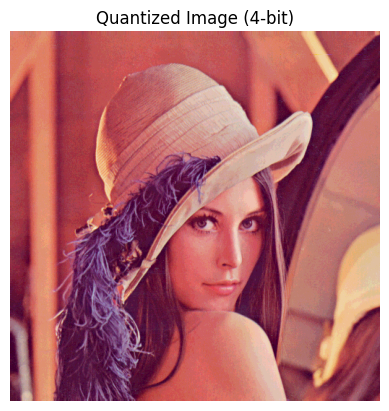

In [37]:
# -------------------------------
# 5️⃣ Color image quantization (e.g., 4-bit)
# -------------------------------
n_bits = 4
quantized = (img1 // (2**(8-n_bits))) * (2**(8-n_bits))
plt.imshow(quantized)
plt.axis('off')
plt.title("Quantized Image (4-bit)")
plt.show()

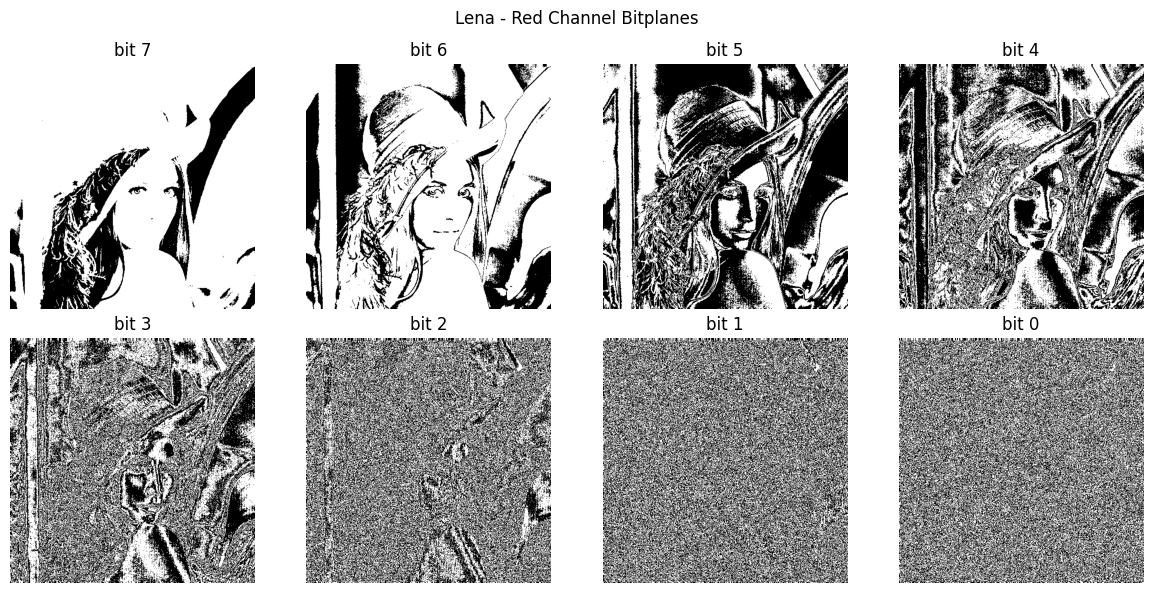

In [38]:
# -------------------------------
# 6️⃣ Bitplanes for the Red channel of lena
# -------------------------------
def show_bitplanes(image, channel, title):
    ch = image[:,:,channel]
    bitplanes = [((ch >> b) & 1)*255 for b in range(8)]
    fig, axes = plt.subplots(2,4, figsize=(12,6))
    for b, ax in enumerate(axes.ravel()):
        ax.imshow(bitplanes[7-b], cmap='gray')
        ax.set_title(f'bit {7-b}')
        ax.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_bitplanes(img1, 0, "Lena - Red Channel Bitplanes")

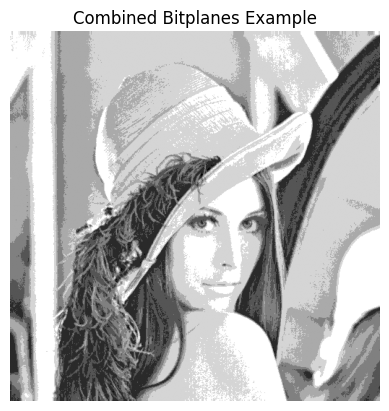

In [39]:
# -------------------------------
# 7️⃣ Combine multiple bitplanes example
# -------------------------------
sum_bitplanes = ( ((img1[:,:,0] >> 7)&1)*128 + ((img1[:,:,0] >> 6)&1)*64 + ((img1[:,:,0] >> 5)&1)*32 ).astype(np.uint8)
plt.imshow(sum_bitplanes, cmap='gray')
plt.axis('off')
plt.title("Combined Bitplanes Example")
plt.show()


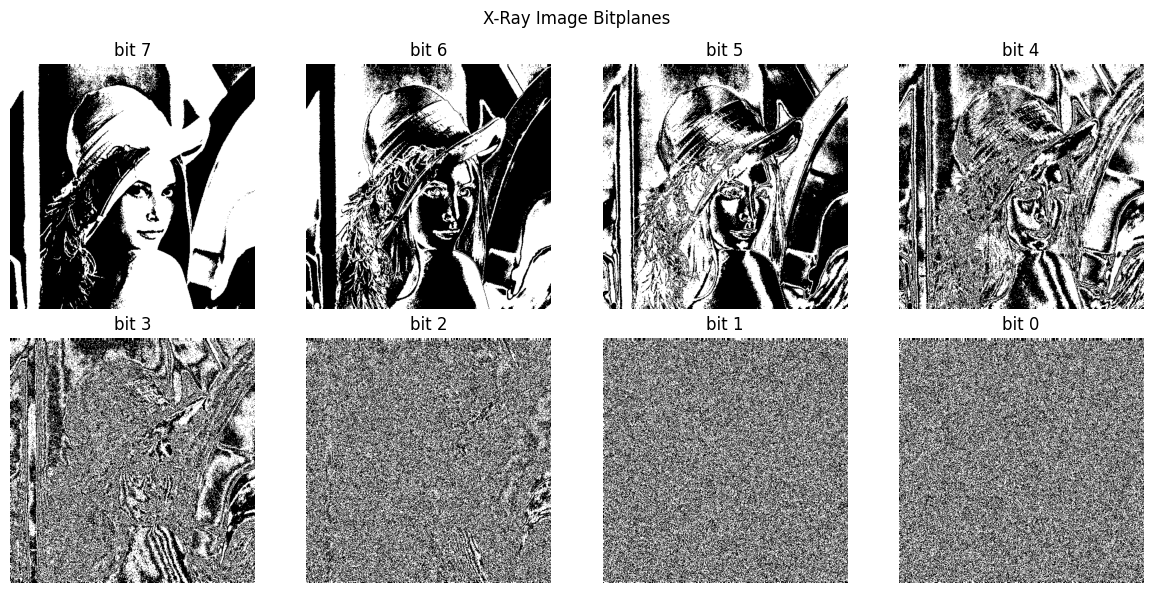

In [40]:
# -------------------------------
# 8️⃣ Bitplanes of X-Ray image
# -------------------------------
bitplanes_xray = [((xray >> b)&1)*255 for b in range(8)]
fig, axes = plt.subplots(2,4, figsize=(12,6))
for b, ax in enumerate(axes.ravel()):
    ax.imshow(bitplanes_xray[7-b], cmap='gray')
    ax.set_title(f'bit {7-b}')
    ax.axis('off')
plt.suptitle("X-Ray Image Bitplanes")
plt.tight_layout()
plt.show()